# Load Packages and Data

## Packages

In [500]:
import contextily as ctx
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
import numpy as np

## Links and Variables

In [501]:
# Data pulled from Community Snow Obs Website
data = 'cso-data.geojson'

# boundary KML File form snowex Flights
boundaries = 'Boundary_KMLs/PLAN_1585_v01_all_swaths_Jan22-May7.kml'



## Read in the Datasets

In [502]:
# Read in the CSO Data
df = gpd.read_file(data)

# use fiona to load in the kml files from the flight boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
flight_bound = gpd.read_file(boundaries, driver='KML')

# Clean up the string a bit
flight_bound['Name'] = flight_bound['Name'].str[0:-12]

flight_bound['Name'][0]



'alamos_35915'

## Check the projections and metadata of each dataset

In [503]:
# do the projections match?
TF = flight_bound.crs == df.crs # test if they are equal
print(f'Do the flight and point data have the same projection: {TF} \n')

print('What Projection are they in: ')
print(f'CSO Depth Projection: {df.crs}')
print(f'Snowex Flight Projection: {flight_bound.crs}')

Do the flight and point data have the same projection: True 

What Projection are they in: 
CSO Depth Projection: epsg:4326
Snowex Flight Projection: epsg:4326


## Visualize

<Figure size 3600x3240 with 0 Axes>

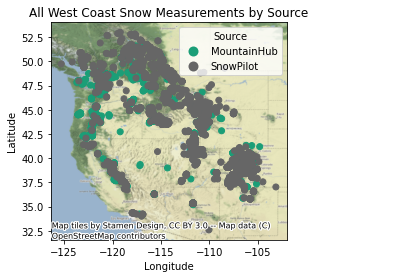

In [504]:
fig = plt.figure(figsize=(50, 45))
ax1 = df.plot(column = 'source',
    cmap = 'Dark2', # set the colormap 
    legend = True, # Turn on the legend  
    legend_kwds={
        # 'bbox_to_anchor': (0.6 , 0.8) , # push the legend off the map
        'title': 'Source' # Label the legend
        }, 
    )
# flight_bound.plot(ax = ax1 ,
#     facecolor = 'none' ,
#     edgecolor = 'black')
ctx.add_basemap(ax1, # Add to the current axis
    crs=df.crs, # Assign the same CRS as the Dataframe
    source=ctx.providers.Stamen.TerrainBackground) # Determine what the base map is


plt.title('All West Coast Snow Measurements by Source')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
# add the base map
ctx.add_basemap(ax1, crs=df.crs)


# Clean

## Clip to the boundaries

In [505]:
# add a site column to the dataframe
df["Site"] = np.nan
# re-order dataframe
df = df[['Site' , 'timestamp' , 'elevation' , 'depth'  , '_ms' , 'geometry' , 'source' , 'author' , 'id']]

# clip to the boundaries
df = gpd.clip(df , flight_bound) # clip the dataframe to the flight boundaries
df # Run a check of number of rows

# Assign a Site to each point
for index, row in df.iterrows(): # for the indices and rows 
    point = row["geometry"] # pull the geometry to test
    for num, ob in flight_bound.iterrows(): # for ever 
        if point.within(ob["geometry"]): 
            # print(ob["Name"]) 
            df["Site"][index] = ob["Name"]  # set the site label at theindex to the flight boundary name

C:\Users\Owner\AppData\Local\Temp\ipykernel_18316\1976107789.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Site"][index] = ob["Name"]  # set the site label at theindex to the flight boundary name
c:\Users\Owner\anaconda3\envs\GDAL\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Plot it again

<Figure size 36000x36000 with 0 Axes>

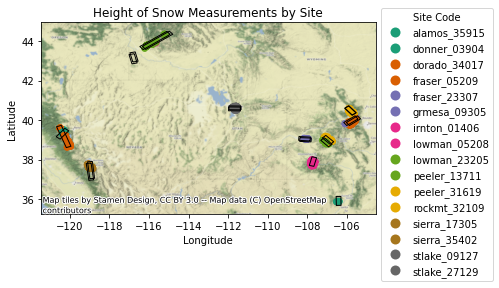

In [506]:
fig = plt.figure(figsize=(500, 500))
# Plot the points
ax1 = df.plot(column = 'Site' , # sorting by the site
    cmap = 'Dark2', # set the colormap 
    legend = True, # Turn on the legend
    legend_kwds={
        'bbox_to_anchor': (1, 1.1) , # push the legend off the map
        'title': 'Site Code' # Label the legend
        }, 
    )
# Plot the boundaries
flight_bound.plot(ax = ax1 , 
    facecolor = 'none' , # empty polygons 
    edgecolor = 'black') # determine the edge color
plt.title('Height of Snow Measurements by Site')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# add the base map
ctx.add_basemap(ax1, crs=df.crs)


alamos_35915
found a baddie
irnton_01406
found a baddie
peeler_13711
found a baddie
peeler_31619
found a baddie
grmesa_27416
found a baddie
grmesa_09305
found a baddie
rockmt_14107
found a baddie
fraser_23307
found a baddie
fraser_05209
found a baddie
rockmt_32109
found a baddie
sierra_17305
found a baddie
sierra_35402
found a baddie
dorado_34017
found a baddie
donner_03904
found a baddie
silver_16718
found a baddie
silver_34715
found a baddie
lowman_05208
found a baddie
lowman_23205
found a baddie
stlake_27129
found a baddie
stlake_09127
found a baddie


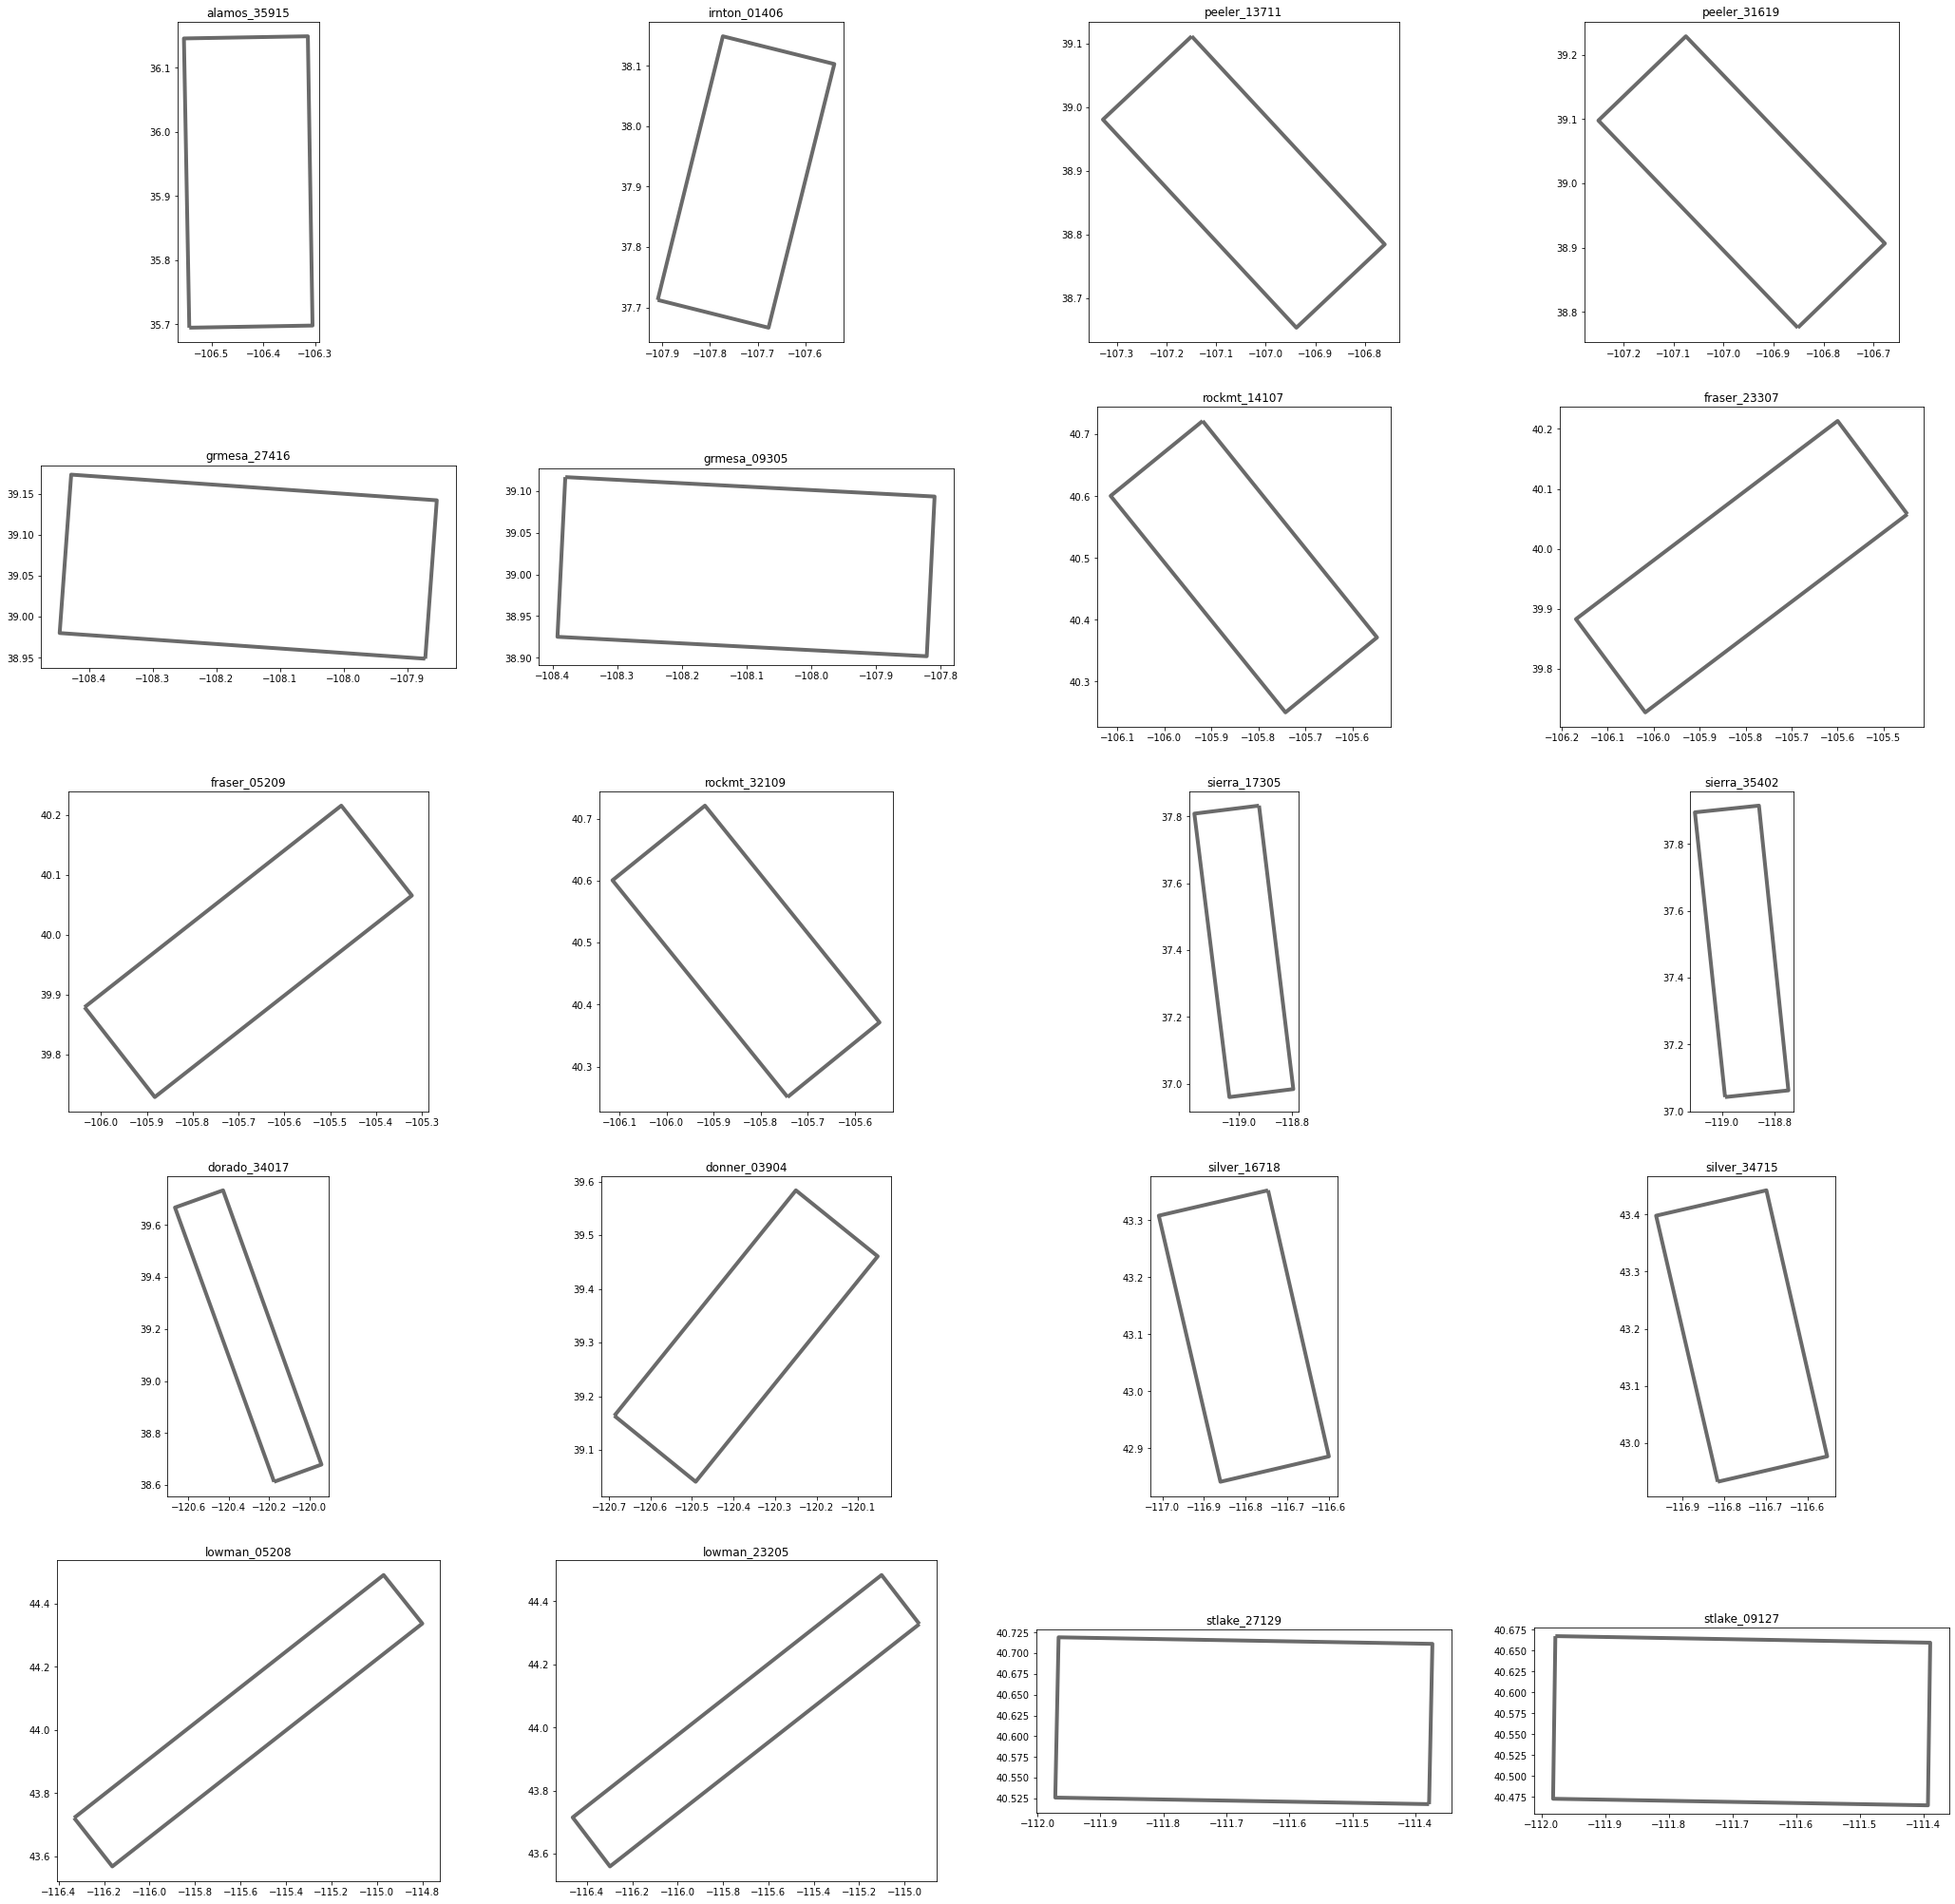

In [575]:
# ax1 = df.groupby('Site').plot(column = 'Site' )
# ctx.add_basemap(ax1, crs=df.crs)
# # # df
# name = flight_bound['Name'][0]
# fig, ax = plt.subplots(4,4, figsize = (40 , 40))
# df['site'][name]


fig, ax1 = plt.subplots(5, 4, figsize=(36, 36))
ax1 = ax1.flatten()

for idx in range(len(flight_bound)):
    # Print the name as an indicator       
    print( flight_bound.iloc[idx]['Name'])
    # print(flight_bound.iloc[idx]['Name'] == 'rockmt_14107')


    # Plot the flight boundaries
    flight_bound.iloc[[idx]].plot(ax=ax1[idx], # plot it on the current figure axis (idx)
        facecolor = 'none', # make sure there is no fill
        edgecolor='#6a6a6a', # Turn the edges black
        linewidth= 4 # Line width
        )
     
    # Set the Title for the subplot
    ax1[idx].set_title(f"{flight_bound.iloc[idx]['Name']}") # Set the title to the

    # # Plot tthe base Map
    # ctx.add_basemap(ax1[idx], 
    #   crs=df.crs) # set the crs to that of the dataframe
    


    ################AAAAAAAAAAAAAAAAAAAAAAAAAA#########################
    # Trying to plot the individual points, 

    # skip the bad ones
    if flight_bound.iloc[idx]['Name'] == 'grmesa_27416' or 'rockmt_14107' or 'silver_16718' or 'silver_34715' :
        print('found a baddie')
        continue

    else:
        print('it''s good')
    # else plot the new ones

    # dnew = df[df['Site'] == flight_bound.iloc[idx]['Name'] ]
    print( flight_bound.iloc[idx]['Name'])
    # dnew = df[df['Site'] == flight_bound['Name'][idx] ]
    # dnew.iloc[[idx]].plot(column = 'Site' , 
    #     ax=ax1[idx], 
    #     # color='#000000', 
    #     # edgecolor='#000000',
    #     )
    # dnew.plot()
    # print(dnew)
    
    # #   flight line
    # except:
    #    print('There was no data')


plt.show()

In [568]:
# df[df['Site'] ==flight_bound['Name'][1] ].plot()
# name = 

# df[df['Site'] == flight_bound.iloc[idx + 1]['Name'] ].plot()
# df[df['Site'] == flight_bound.iloc[idx + 1]['Name'] ].plot()
# print(flight_bound.iloc[idx+1]['Name'] == 'rockmt_14107')

               Site            timestamp    elevation  depth            _ms  \
1247   stlake_09127  2019-12-17T03:58:54  2914.349365  158.0  1576555134584   
1563   stlake_09127  2021-12-24T20:08:57  2814.060059   79.0  1640376537677   
1564   stlake_09127  2019-01-27T19:00:00  2660.099609  240.0  1548615600000   
1565   stlake_09127  2021-11-29T21:19:22  3041.848389   75.0  1638220762995   
1566   stlake_09127  2017-03-02T00:52:01  2679.479492  254.0  1488415921618   
...             ...                  ...          ...    ...            ...   
9995   stlake_09127  2022-01-13T18:40:00  2496.488281   85.0  1642099200000   
9996   stlake_09127  2018-01-28T04:49:18  2461.712646  115.0  1517114958000   
9997   stlake_09127  2022-01-09T18:30:00  2416.461670  105.0  1641753000000   
10054  stlake_09127  2020-02-05T18:00:00  1544.833740   65.0  1580925600000   
10094  stlake_09127  2021-01-25T18:30:00  1530.441650  100.0  1611599400000   

                          geometry       source    

<AxesSubplot:>

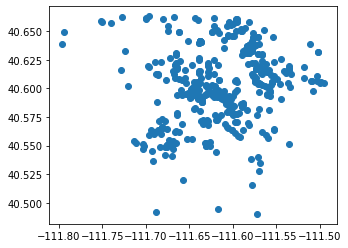

In [569]:
# # ax = df.groupby('Site').plot(title = df['Site'])
# # Problematic Site Names = grmesa_27416 , rockmt_14107 , silver_16718 , silver_34715
# name = flight_bound['Name'][20]

# print(name)
# df[df['Site'] == name ].plot()
dnew = df[df['Site'] == flight_bound.iloc[idx]['Name'] ]
        # dnew.iloc[[idx]].plot(column = 'depth',ax=ax1[idx], color='#000000', edgecolor='#000000')
        # dnew.plot( ax = ax1[idx])
print(dnew)

dnew.plot()
